In [1]:
import pandas as pd
import os

In [2]:
def calculate_values_averages(df,method):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
            results.append([
                row_count,
                method,
                place_value,
                abs(float(data[i][0])-place_values[place_value][0]),
               abs(float(data[i][1])-place_values[place_value][1]),
              abs(float(data[i][2])-place_values[place_value][2]),
                ])
            row_count+=1
    return results
            
    
    
    

In [3]:

# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [4]:


root_path = r"C:\Users\takaharayota\Research\Exp1-data\村上\values"
files_paths = [
         root_path + r"\音無し.txt",
   
    root_path + r"\離散指数.txt",
    root_path + r"\連続指数.txt",
      root_path + r"\連続線形.txt",
         root_path + r"\離散線形.txt",
    
]

# 全てのフォルダを処理し、結果を統合
all_results = []
for i, file_path in enumerate(files_paths):
        method=i-1
        df = read_txt_to_dataframe(file_path)
        all_results.extend(calculate_values_averages(df, method))
    
print(all_results)  



# 統合されたデータをデータフレームに変換
columns = ['Subject','Method', 'Place', 'X', 'Y', 'Z']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

print("DataFrameの内容がoutput.txtに出力されました。")


[[0, -1, 3, 0.0512688, 0.008964800000000009, 0.08569505], [1, -1, 3, 0.030835400000000013, 0.038233050000000005, 0.09867525], [2, -1, 3, 0.06863249999999999, 0.015340560000000003, 0.07923932], [3, -1, 3, 0.002059499999999992, 0.02917464, 0.1019575], [4, -1, 3, 0.03569329999999998, 0.04835988000000001, 0.1724284], [0, -1, 2, 0.04467140000000003, 0.04685339999999999, 0.03954528], [1, -1, 2, 0.03581210000000001, 0.06692109999999998, 0.006310037], [2, -1, 2, 0.021051400000000053, 0.055621000000000004, 0.03819897], [3, -1, 2, 0.025329799999999958, 0.09112029999999999, 0.02378127], [4, -1, 2, 0.02589319999999995, 0.07287659999999999, 0.07638223], [0, -1, 0, 0.014915299999999992, 0.00413237000000001, 0.006551472], [1, -1, 0, 0.02020630000000001, 0.00853785, 0.007898998], [2, -1, 0, 0.013569200000000003, 0.01560955, 0.002883814], [3, -1, 0, 0.018566799999999994, 0.02096104, 0.0119529], [4, -1, 0, 0.017645099999999997, 0.02462093, 0.0029524], [0, -1, 1, 0.01673469999999999, 0.022194599999999995

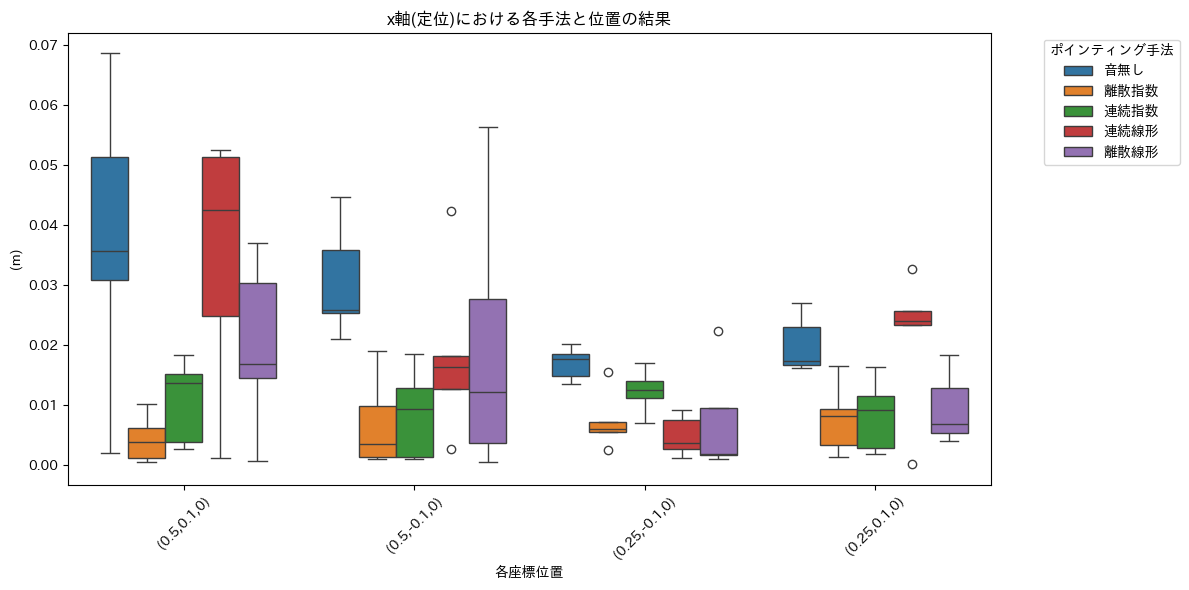

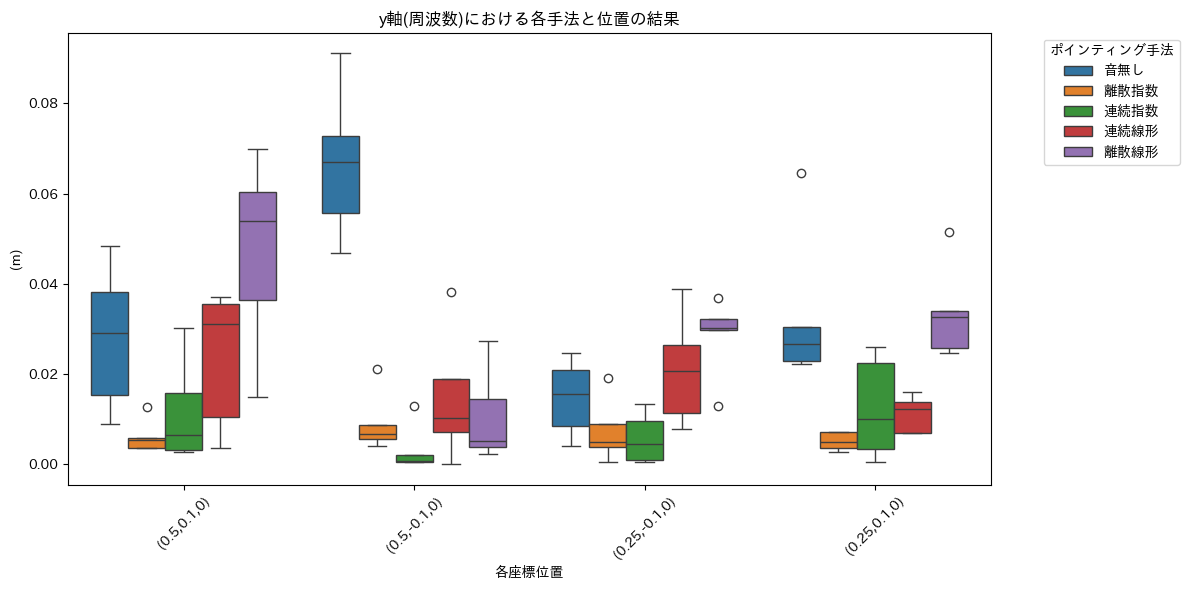

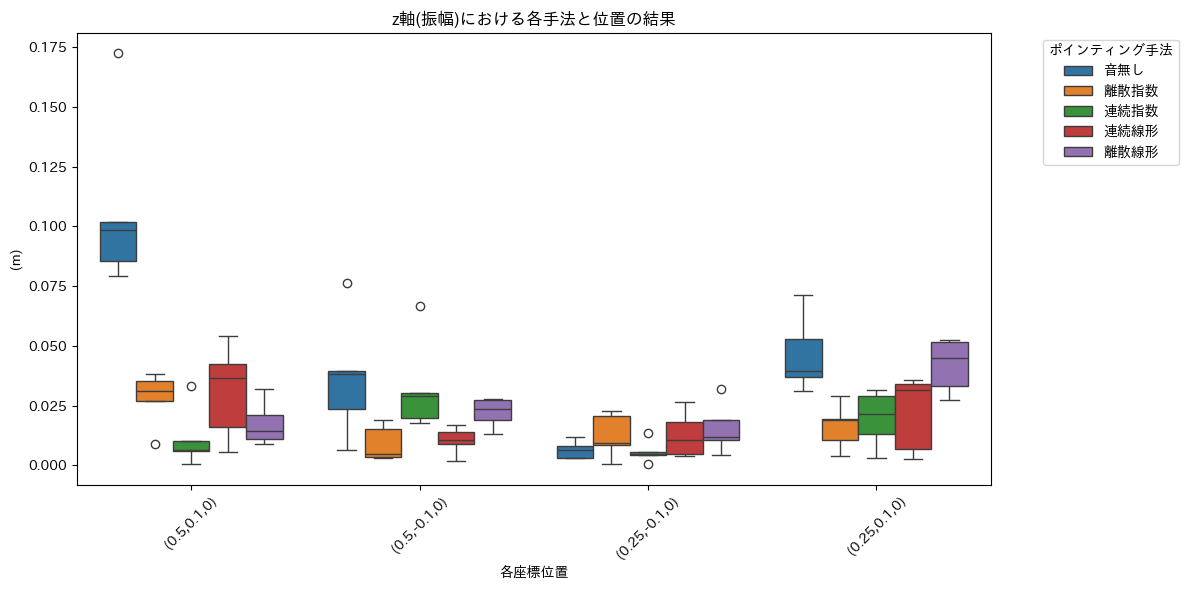

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',

  
    
    

}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
